# Objective
 You are the best data scientist in Greenland and they've hired you to solve this problem. Now you are responsible for developing a model that will predict the chances of survival of a patient after 1 year of treatment (Survived_1_year).

Evaluation Criteria Submissions are evaluated using the F1 Score. How do we do it?

Once you generate and submit the target variable predictions on evaluation dataset, your submissions will be compared with the true values of the target variable.

The True or Actual values of the target variable are hidden on the DPhi Practice platform so that we can evaluate your model's performance on evaluation data. Finally, an F1 score for your model will be generated and displayed

About the dataset The dataset contains the patient records collected from a hospital in Greenland. The "Survived_1_year" column is a target variable which has binary entries (0 or 1).

Survived_1_year == 0, implies that the patient did not survive after 1 year of treatment

Survived_1_year == 1, implies that the patient survived after 1 year of treatment.

# Data Description:
ID_Patient_Care_Situation: Care situation of a patient during treatment

Diagnosed_Condition: The diagnosed condition of the patient

ID_Patient: Patient identifier number

Treatment_with_drugs: Class of drugs used during treatment

Survived_1_year: If the patient survived after one year (0 means did not survive; 1 means survived)

Patient_Age: Age of the patient

Patient_Body_Mass_Index: A calculated value based on the patient’s weight, height, etc.

Patient_Smoker: If the patient was a smoker or not

Patient_Rural_Urban: If the patient stayed in Rural or Urban part of the country

Previous_Condition: Condition of the patient before the start of the treatment ( This variable is splitted into 8 columns - A, B, C, D, E, F, Z and Number_of_prev_cond. A, B, C, D, E, F and Z are the previous conditions of the patient. Suppose for one patient, if the entry in column A is 1, it means that the previous condition of the patient was A. If the patient didn't have that condition, it is 0 and same for other conditions. If a patient has previous condition as A and C , columns A and C will have entries as 1 and 1 respectively while the other column B, D, E, F, Z will have entries 0, 0, 0, 0, 0 respectively. The column Number_of_prev_cond will have entry as 2 i.e. 1 + 0 + 1 + 0 + 0 + 0 + 0 + 0 = 2 in this case. )

In [290]:
#importing all libraries
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import tree


In [291]:
import warnings

In [292]:
#load the traing dataset as pharma_data
pharma_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv')

In [293]:
#To show the first five 
pharma_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [294]:
#To show the number of columns
pharma_data.columns

Index(['ID_Patient_Care_Situation', 'Diagnosed_Condition', 'Patient_ID',
       'Treated_with_drugs', 'Patient_Age', 'Patient_Body_Mass_Index',
       'Patient_Smoker', 'Patient_Rural_Urban', 'Patient_mental_condition',
       'A', 'B', 'C', 'D', 'E', 'F', 'Z', 'Number_of_prev_cond',
       'Survived_1_year'],
      dtype='object')

In [295]:
#columns details
pharma_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23084 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   Patient_mental_condition   23097 non-null  object 
 9   A                          21862 non-null  float64
 10  B                          21862 non-null  float64
 11  C                          21862 non-null  float64
 12  D                          21862 non-null  float64
 13  E                          21862 non-null  flo

In [296]:
#replace the positive infinity and negative infinity if there exists any in the dataset
pharma_data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [297]:
#details of columns having object datatype
pharma_data.select_dtypes(include=['object']).dtypes


Treated_with_drugs          object
Patient_Smoker              object
Patient_Rural_Urban         object
Patient_mental_condition    object
dtype: object

In [298]:
pharma_data.Patient_Smoker.unique()

array(['YES', 'NO', 'Cannot say'], dtype=object)

In [299]:
# In Patient_Smoker column 'cannot' say is not useful.So we need to ommit the row
pharma_data= pharma_data[pharma_data['Patient_Smoker']!= 'Cannot say']

In [300]:
pharma_data.Patient_mental_condition.unique()

array(['Stable'], dtype=object)

In [301]:
 #details of columns having numerical datatype
pharma_data.select_dtypes(include=['number']).dtypes

ID_Patient_Care_Situation      int64
Diagnosed_Condition            int64
Patient_ID                     int64
Patient_Age                    int64
Patient_Body_Mass_Index      float64
A                            float64
B                            float64
C                            float64
D                            float64
E                            float64
F                            float64
Z                            float64
Number_of_prev_cond          float64
Survived_1_year                int64
dtype: object

In [302]:
#details of missing values for each columns in training dataset
pharma_data.isnull().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs              0
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1235
B                            1235
C                            1235
D                            1235
E                            1235
F                            1235
Z                            1235
Number_of_prev_cond          1235
Survived_1_year                 0
dtype: int64

In [303]:
#fill the missing value
pharma_data['Number_of_prev_cond']=pharma_data['Number_of_prev_cond'].fillna(method='ffill')
pharma_data['A']=pharma_data['A'].fillna(method='ffill')
pharma_data['B']=pharma_data['B'].fillna(method='ffill')
pharma_data['C']=pharma_data['C'].fillna(method='ffill')
pharma_data['D']=pharma_data['D'].fillna(method='ffill')
pharma_data['E']=pharma_data['E'].fillna(method='ffill')
pharma_data['F']=pharma_data['F'].fillna(method='ffill')
#pharma_data['Z']=pharma_data['Z'].fillna(method='ffill')
pharma_data['Treated_with_drugs']=pharma_data['Treated_with_drugs'].fillna(method='ffill')

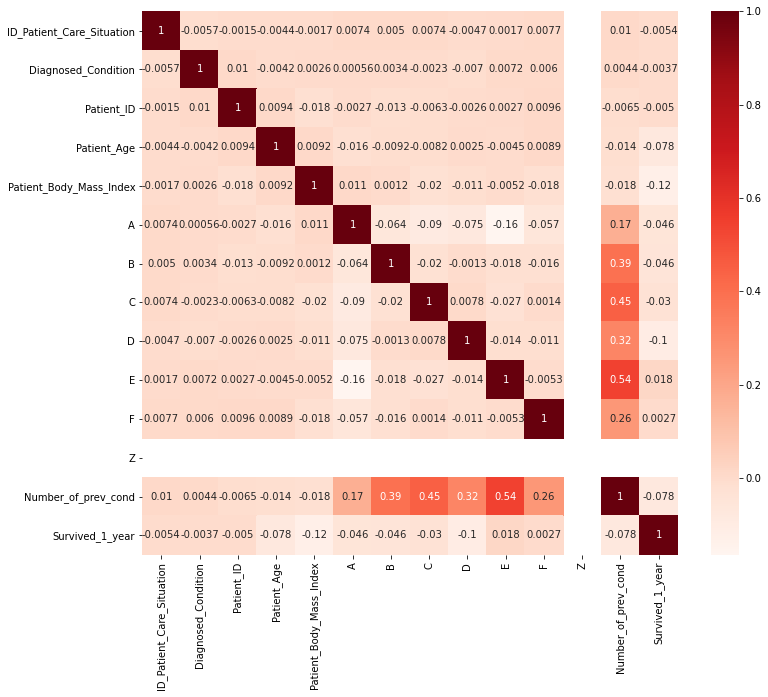

In [304]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = pharma_data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [305]:
# Ommit the columns which are not useful in prediction 
pharma_data.drop(['ID_Patient_Care_Situation','Patient_ID','Patient_mental_condition','Z'],axis=1,inplace=True)

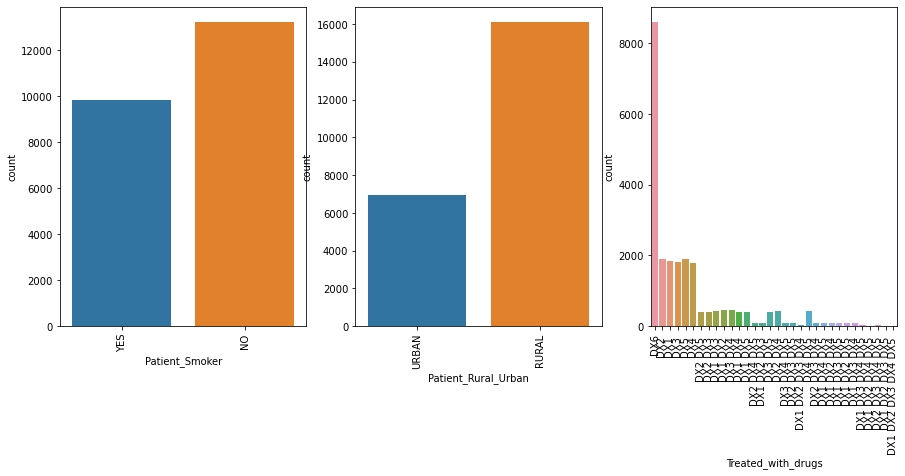

In [306]:
#plot the categorical columns
categorical = pharma_data[['Patient_Smoker','Patient_Rural_Urban','Treated_with_drugs']]
plt.figure(figsize=(15,20))
for i, col in enumerate(categorical):
    ax = plt.subplot(3,3,i+1)
    plt.xticks(rotation=90)
    sns.countplot(data=pharma_data,x=col,ax=ax)

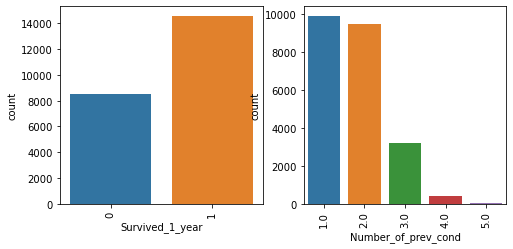

In [307]:
# tplot the numerical columns
numerical = pharma_data[['Survived_1_year','Number_of_prev_cond']]
plt.figure(figsize=(8,8))
for i, col in enumerate(numerical):
    ax = plt.subplot(2,2,i+1)
    plt.xticks(rotation=90)
    sns.countplot(data=pharma_data,x=col,ax=ax)

In [308]:
#convert all object datatpe columns into numerical .
df_drug = pd.get_dummies(pharma_data['Treated_with_drugs'])
df_smoker = pd.get_dummies(pharma_data['Patient_Smoker'])
df_rural_urban = pd.get_dummies(pharma_data['Patient_Rural_Urban'])

In [309]:
#concat all dummy columns with training dataset
df_pharma = pd.concat([pharma_data, df_drug, df_smoker,df_rural_urban],axis=1)

In [310]:
#drop the object datatype columns
df_pharma.drop(['Patient_Rural_Urban','Patient_Smoker','Treated_with_drugs'],axis=1,inplace=True)

In [311]:
df_pharma.columns#check if all numerical columns or not

Index(['Diagnosed_Condition', 'Patient_Age', 'Patient_Body_Mass_Index', 'A',
       'B', 'C', 'D', 'E', 'F', 'Number_of_prev_cond', 'Survived_1_year',
       'DX1 ', 'DX1 DX2 ', 'DX1 DX2 DX3 ', 'DX1 DX2 DX3 DX4 ',
       'DX1 DX2 DX3 DX4 DX5 ', 'DX1 DX2 DX3 DX5 ', 'DX1 DX2 DX4 ',
       'DX1 DX2 DX4 DX5 ', 'DX1 DX2 DX5 ', 'DX1 DX3 ', 'DX1 DX3 DX4 ',
       'DX1 DX3 DX4 DX5 ', 'DX1 DX3 DX5 ', 'DX1 DX4 ', 'DX1 DX4 DX5 ',
       'DX1 DX5 ', 'DX2 ', 'DX2 DX3 ', 'DX2 DX3 DX4 ', 'DX2 DX3 DX4 DX5 ',
       'DX2 DX3 DX5 ', 'DX2 DX4 ', 'DX2 DX4 DX5 ', 'DX2 DX5 ', 'DX3 ',
       'DX3 DX4 ', 'DX3 DX4 DX5 ', 'DX3 DX5 ', 'DX4 ', 'DX4 DX5 ', 'DX5 ',
       'DX6', 'NO', 'YES', 'RURAL', 'URBAN'],
      dtype='object')

In [312]:
x=df_pharma.drop('Survived_1_year',axis=1)#Feature matrix
y=df_pharma.Survived_1_year #target

In [313]:
x.head()

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Number_of_prev_cond,...,DX3 DX4 DX5,DX3 DX5,DX4,DX4 DX5,DX5,DX6,NO,YES,RURAL,URBAN
0,8,56,18.479385,1.0,0.0,0.0,0.0,1.0,0.0,2.0,...,0,0,0,0,0,1,0,1,0,1
1,5,36,22.945566,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,1,1,0
2,23,48,27.510027,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,1,0,1,1,0
3,51,5,19.130976,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,1,0,0,1
5,45,47,26.155120,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,1,0,1,0,1


In [314]:
y.head()

0    0
1    1
2    0
3    1
5    0
Name: Survived_1_year, dtype: int64

In [315]:
#split the training dataset into training and validation dataset
from sklearn.model_selection import train_test_split
x_train,x_valid,y_train,y_valid=train_test_split(x,y,random_state=42,test_size=0.25)# training and validation spliting to avoid overfiiting
x_train.shape,x_valid.shape,y_train.shape,y_valid.shape

((17313, 46), (5771, 46), (17313,), (5771,))

In [316]:
#Fitting Decision Tree classifier to the training set  
from sklearn.tree import DecisionTreeClassifier  
model= DecisionTreeClassifier(criterion='entropy',random_state=42,max_depth=3)  
model.fit(x_train,y_train)  

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

<Figure size 21000x33000 with 0 Axes>

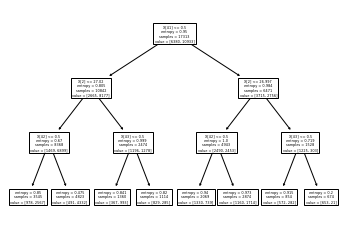

<Figure size 21000x33000 with 0 Axes>

In [317]:
#plot the tree
tree.plot_tree(model)
plt.figure(figsize=(35,55),dpi=600)

In [318]:
y_predict= model.predict(x_valid)
y_predict.shape

(5771,)

In [319]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cf_matrix=confusion_matrix(y_valid, y_predict)
print(cf_matrix)

[[1110 1004]
 [ 448 3209]]


<AxesSubplot:>

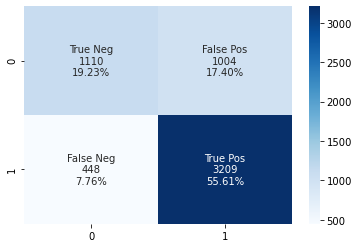

In [320]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [321]:
#accuracy prediction
from sklearn.metrics import accuracy_score
accuracy_score(y_valid, y_predict)

0.7483971582048172

In [322]:
from sklearn.metrics import accuracy_score,f1_score

In [323]:
#f1 score
rf_fscore = f1_score(y_valid ,y_predict)
rf_fscore

0.8155019059720457

In [324]:
#read the test daraset
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_begs.csv')
test_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,19150,40,3709,DX3,16,29.443894,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,23216,52,986,DX6,24,26.836321,NO,URBAN,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,11890,50,11821,DX4 DX5,63,25.523280,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,7149,32,3292,DX6,42,27.171155,NO,URBAN,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
4,22845,20,9959,DX3,50,25.556192,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [325]:
##columns details
test_data.columns

Index(['ID_Patient_Care_Situation', 'Diagnosed_Condition', 'Patient_ID',
       'Treated_with_drugs', 'Patient_Age', 'Patient_Body_Mass_Index',
       'Patient_Smoker', 'Patient_Rural_Urban', 'Patient_mental_condition',
       'A', 'B', 'C', 'D', 'E', 'F', 'Z', 'Number_of_prev_cond'],
      dtype='object')

In [326]:
##details of columns having numerical datatype
pharma_data.select_dtypes(include=['number']).dtypes

Diagnosed_Condition          int64
Patient_Age                  int64
Patient_Body_Mass_Index    float64
A                          float64
B                          float64
C                          float64
D                          float64
E                          float64
F                          float64
Number_of_prev_cond        float64
Survived_1_year              int64
dtype: object

In [327]:
##details of columns having object datatype
test_data.select_dtypes(include=['object']).dtypes

Treated_with_drugs          object
Patient_Smoker              object
Patient_Rural_Urban         object
Patient_mental_condition    object
dtype: object

In [328]:
test_data['Patient_Smoker'].unique()

array(['NO', 'YES'], dtype=object)

In [329]:
test_data['Patient_Rural_Urban'].unique()

array(['RURAL', 'URBAN'], dtype=object)

In [330]:
test_data['Treated_with_drugs'].unique() 

array(['DX3 ', 'DX6', 'DX4 DX5 ', 'DX1 DX2 ', 'DX1 DX2 DX4 ', 'DX2 ',
       'DX5 ', 'DX3 DX4 DX5 ', 'DX1 DX3 ', 'DX1 ', 'DX2 DX5 ', 'DX1 DX4 ',
       'DX2 DX3 ', 'DX4 ', 'DX1 DX4 DX5 ', 'DX3 DX4 ', 'DX3 DX5 ',
       'DX2 DX4 ', 'DX1 DX5 ', 'DX1 DX3 DX4 ', 'DX2 DX3 DX4 ',
       'DX1 DX2 DX3 ', 'DX1 DX3 DX4 DX5 ', 'DX1 DX3 DX5 ',
       'DX1 DX2 DX3 DX5 ', 'DX2 DX3 DX5 ', 'DX2 DX3 DX4 DX5 ',
       'DX1 DX2 DX5 ', 'DX1 DX2 DX4 DX5 ', 'DX2 DX4 DX5 ',
       'DX1 DX2 DX3 DX4 DX5 ', 'DX1 DX2 DX3 DX4 '], dtype=object)

In [331]:
#calculate missimg values
test_data.isnull().sum()

ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Patient_ID                   0
Treated_with_drugs           0
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
Patient_mental_condition     0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
dtype: int64

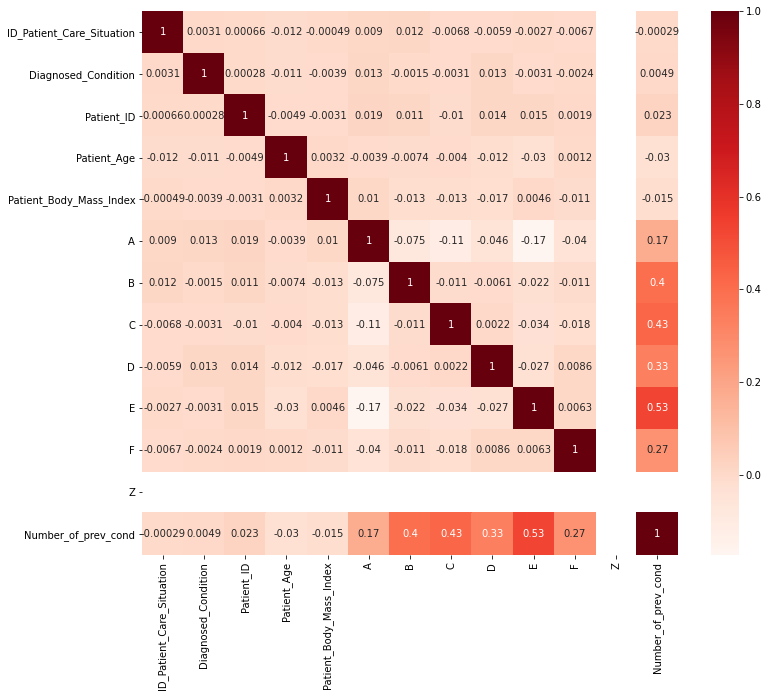

In [332]:
#heatmap diagram
plt.figure(figsize=(12,10))
cor = test_data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [333]:
#drop columns which are least effective for prediction
test_data.drop(['ID_Patient_Care_Situation','Patient_ID','Patient_mental_condition','Z'],axis=1,inplace=True)

In [334]:
#convert object columns into numerical
test_drug = pd.get_dummies(test_data['Treated_with_drugs'])
test_smoker = pd.get_dummies(test_data['Patient_Smoker'])
test_rural_urban = pd.get_dummies(test_data['Patient_Rural_Urban'])

In [335]:
#concat with origin test data with numerical columns
df_test = pd.concat([test_data, test_drug, test_smoker,test_rural_urban],axis=1)
df_test

,Diagnosed_Condition,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,A,B,C,D,...,DX3 DX4 DX5,DX3 DX5,DX4,DX4 DX5,DX5,DX6,NO,YES,RURAL,URBAN
0,40,DX3,16,29.443894,NO,RURAL,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,1,0
1,52,DX6,24,26.836321,NO,URBAN,1.0,1.0,0.0,0.0,...,0,0,0,0,0,1,1,0,0,1
2,50,DX4 DX5,63,25.523280,NO,RURAL,1.0,0.0,0.0,0.0,...,0,0,0,1,0,0,1,0,1,0
3,32,DX6,42,27.171155,NO,URBAN,1.0,0.0,1.0,0.0,...,0,0,0,0,0,1,1,0,0,1
4,20,DX3,50,25.556192,NO,RURAL,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9298,11,DX6,28,29.106314,NO,RURAL,1.0,1.0,1.0,0.0,...,0,0,0,0,0,1,1,0,1,0
9299,7,DX1,4,20.616673,NO,URBAN,1.0,1.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,1
9300,16,DX1 DX3 DX4 DX5,20,24.727357,YES,URBAN,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,1
9301,50,DX4,33,17.517426,NO,URBAN,1.0,1.0,1.0,1.0,...,0,0,1,0,0,0,1,0,0,1


In [336]:
#After  numerical convertion and concatination we need to omit the object dtype columns
df_test.drop(['Treated_with_drugs','Patient_Smoker','Patient_Rural_Urban'],axis=1,inplace=True)
df_test.head()

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Number_of_prev_cond,...,DX3 DX4 DX5,DX3 DX5,DX4,DX4 DX5,DX5,DX6,NO,YES,RURAL,URBAN
0,40,16,29.443894,1.0,0.0,0.0,0.0,1.0,0.0,2.0,...,0,0,0,0,0,0,1,0,1,0
1,52,24,26.836321,1.0,1.0,0.0,0.0,0.0,0.0,2.0,...,0,0,0,0,0,1,1,0,0,1
2,50,63,25.523280,1.0,0.0,0.0,0.0,1.0,0.0,2.0,...,0,0,0,1,0,0,1,0,1,0
3,32,42,27.171155,1.0,0.0,1.0,0.0,1.0,0.0,3.0,...,0,0,0,0,0,1,1,0,0,1
4,20,50,25.556192,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,1,0,1,0


In [337]:
#column info
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9303 entries, 0 to 9302
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Diagnosed_Condition      9303 non-null   int64  
 1   Patient_Age              9303 non-null   int64  
 2   Patient_Body_Mass_Index  9303 non-null   float64
 3   A                        9303 non-null   float64
 4   B                        9303 non-null   float64
 5   C                        9303 non-null   float64
 6   D                        9303 non-null   float64
 7   E                        9303 non-null   float64
 8   F                        9303 non-null   float64
 9   Number_of_prev_cond      9303 non-null   float64
 10  DX1                      9303 non-null   uint8  
 11  DX1 DX2                  9303 non-null   uint8  
 12  DX1 DX2 DX3              9303 non-null   uint8  
 13  DX1 DX2 DX3 DX4          9303 non-null   uint8  
 14  DX1 DX2 DX3 DX4 DX5     

In [338]:
#predict using previously prepared model with test dataset
prediction = model.predict(df_test)

In [339]:
#convert data to csv file
prediction_data = pd.DataFrame(prediction)
prediction_data.to_csv("prediction.csv",header=["prediction"],index=False, )